## Pet Breed Recognizer

I am working with different types of pets, focusing on six of the most common pets, including dogs, cats, rabbits, hamsters, and fish. The goal of this project is to classify 30 different types of pets common around the world. The types are as follows:

### Dogs:
1. Labrador Retriever
2. German Shepherd
3. Bulldog
4. Poodle
5. Golden Retriever

### Cats:
6. Persian Cat
7. Siamese Cat
8. Maine Coon
9. Bengal Cat
10. Sphynx Cat

<!-- ### Rabbits:
11. Holland Lop
12. Mini Rex
13. Netherland Dwarf
14. Lionhead Rabbit
15. Flemish Giant -->

### Hamsters:
11. Syrian Hamster
12. Campbell's Dwarf Hamster
13. Roborovski Hamster
14. Winter White Dwarf Hamster
15. Chinese Hamster

### Fish:
16. Betta Fish
17. Goldfish
18. Guppy
19. Angelfish
20. Neon Tetra

### Birds:
21. Parakeet (Budgie)
22. Cockatiel
23. African Grey Parrot
24. Lovebird
25. Canary



# Setting Up Necessary Things

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip install -Uqq fastai fastbook nbdev

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Pet Breed Recognizer

/content/drive/MyDrive/Pet Breed Recognizer


# Download Images from Browser

In [ ]:
pet_breeds = [
    "labrador retriever dog breed",
    "german shepherd dog breed",
    "bulldog dog breed",
    "poodle dog breed",
    "golden retriever dog breed",
    "persian cat breed",
    "siamese cat breed",
    "maine coon cat breed",
    "bengal cat breed",
    "sphynx cat breed",
    "syrian hamster breed",
    "campbell's dwarf hamster breed",
    "roborovski hamster breed",
    "winter white dwarf hamster breed",
    "chinese hamster breed",
    "betta fish breed",
    "goldfish breed",
    "guppy fish breed",
    "angelfish breed",
    "neon tetra fish breed",
    "parakeet bird breed",
    "cockatiel bird breed",
    "african grey parrot bird breed",
    "lovebird breed",
    "canary bird breed"
]

length_of_pet_breeds = len(pet_breeds)
print(length_of_pet_breeds)


25


In [ ]:
images = search_images_ddg(pet_breeds[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://images.saymedia-content.com/.image/t_share/MTc0OTY4MTUzMjkyNDE2OTky/differences-between-labrador-retrievers-and-golden-retrievers.jpg'

In [ ]:
dest = "german shepherd dog breed.jpg"
download_url(images[0], dest, show_progress=False)

Path('german shepherd dog breed.jpg')

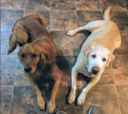

In [ ]:
image = Image.open(dest)
image.to_thumb(128, 128)

## Combine all of them

In [ ]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for pet_breed in pet_breeds:

  dest = f"{data_path}/{pet_breed}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    cap_image_urls = search_images_ddg(pet_breed)
    download_images(dest, urls = cap_image_urls)

  except:
    continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#4660) [Path('data/labrador retriever dog breed/0363ac19-fac2-46de-899e-eebd740fe7b5.jpg'),Path('data/labrador retriever dog breed/d1d8bce3-0cfe-403a-bd74-09e122ae92c5.jpg'),Path('data/labrador retriever dog breed/be956bda-04b4-4262-a54a-14ae687c650c.jpg'),Path('data/labrador retriever dog breed/0f829735-0786-40b2-81f4-193cf2e7ffae.jpg'),Path('data/labrador retriever dog breed/2ba00cd0-3a57-4861-a991-27188cdb09bf.jpg'),Path('data/labrador retriever dog breed/820cce19-f517-43a6-80b8-1cdec069a94a.jpg'),Path('data/labrador retriever dog breed/2e338c49-357b-4095-a5c0-553f3fb0ea30.jpg'),Path('data/labrador retriever dog breed/1d369f37-8756-4cd9-8481-574873abe4fc.jpg'),Path('data/labrador retriever dog breed/b0ec2085-b130-4b18-a8ff-bf5fb0ae559d.jpg'),Path('data/labrador retriever dog breed/70b78779-9f2d-412c-95bb-b86eb1435571.jpg')...]

In [ ]:
failed = verify_images(image_counts)
failed

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:900: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


(#148) [Path('data/labrador retriever dog breed/0f829735-0786-40b2-81f4-193cf2e7ffae.jpg'),Path('data/labrador retriever dog breed/b0ec2085-b130-4b18-a8ff-bf5fb0ae559d.jpg'),Path('data/labrador retriever dog breed/184a3071-1f75-4b78-869a-df0bd2ed9209.jpg'),Path('data/labrador retriever dog breed/00f18bfc-f610-4c9f-9eb4-9bc9928e7282.jpg'),Path('data/labrador retriever dog breed/e1fbe29b-04ac-40fc-9997-79986ecbec45.jpg'),Path('data/labrador retriever dog breed/c0cda717-979e-4b6d-a03b-72629b5f8a81.jpg'),Path('data/labrador retriever dog breed/79e371e6-12c3-4d38-b0ad-24cd756e584d.jpg'),Path('data/german shepherd dog breed/c4095fd2-65ba-44c5-88e5-21a990927fb2.jpg'),Path('data/german shepherd dog breed/813b8125-bd5f-4a17-8193-d0ccdd0ea2ee.jpg'),Path('data/german shepherd dog breed/dd4cd98f-c924-4752-8480-996d6fd8f528.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#148) [None,None,None,None,None,None,None,None,None,None...]